## Basic Path Selection 
- Incorporating Path Selection based on Population and Distance


Top 5 Routes:
London: 8,982,000
Paris: 2,141,000
Moscow: 12,615,000
Dubai: 3,330,000
Tokyo: 13,960,000

Top 5 Total Population Visited: 
41,028,000

All Cities:
0 London
1 Paris
8 Moscow
7 Dubai
6 Tokyo
5 Sydney
9 Rio de Janeiro
2 New York
3 Los Angeles
4 San Francisco
0 London


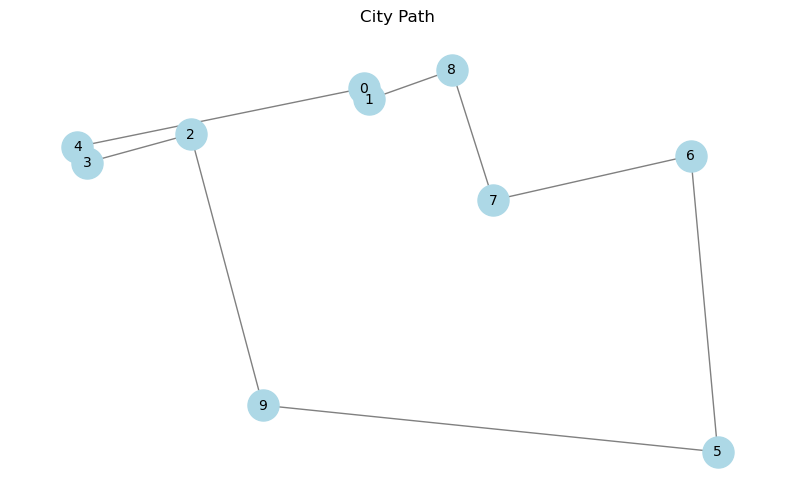

In [30]:
# Minimize distance travelled
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Example city data (name, latitude, longitude, population)
cities = [
    ("London", 51.5074, -0.1278, 8982000),
    ("Paris", 48.8566, 2.3522, 2141000),
    ("New York", 40.7128, -74.0060, 8399000),
    ("Los Angeles", 34.0522, -118.2437, 3990000),
    ("San Francisco", 37.7749, -122.4194, 883000),
    ("Sydney", -33.8651, 151.2099, 5312000),
    ("Tokyo", 35.6895, 139.6917, 13960000),
    ("Dubai", 25.2048, 55.2708, 3330000),
    ("Moscow", 55.7558, 37.6176, 12615000),
    ("Rio de Janeiro", -22.9068, -43.1729, 6748000)
]

# Calculate pairwise distances between cities
# currently using Euclidean distance but should change to haversine equation - not correct in current form
coordinates = np.array([(lat, lon) for _, lat, lon, _ in cities])
distances = cdist(np.radians(coordinates), np.radians(coordinates), metric='euclidean') * 6371  # Earth radius in km

# Set distances less than 20 miles to infinity
distances[distances < 20 / 0.621371] = np.inf

# Solve TSP using the nearest neighbor heuristic
num_cities = len(cities)
unvisited = set(range(1, num_cities))  # Exclude starting city
route = [0]  # Starting city is always the first
current_city = 0

while unvisited:
    next_city = min(unvisited, key=lambda city: distances[current_city, city])
    route.append(next_city)
    unvisited.remove(next_city)
    current_city = next_city

# Add starting city to complete the route
route.append(0)

# Output the route and total population visited
total_population = sum(cities[city][3] for city in route[0:5])
route_cities = [(cities[city][0],cities[city][3]) for city in route[0:5]]  # Get city names from the route indices

print("\nTop 5 Routes:")
for i in route_cities:
    print(f"{i[0]}: {i[1]:0,}")

print(f"\nTop 5 Total Population Visited: \n{total_population:0,}")

print("\nAll Cities:") 
for city in route:
    print(f"{city} {cities[city][0]}")

# Create network graph and add edges
G = nx.Graph()
for i in range(num_cities):
    G.add_node(i, label=cities[i][0])

for i in range(len(route) - 1):
    G.add_edge(route[i], route[i+1])

# Position nodes based on latitude and longitude
pos = {i: (lon, lat) for i, (_, lat, lon, _) in enumerate(cities)}

# Plot network diagram
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
plt.title("City Path")
plt.axis('off')
plt.show()
